In [1]:
from pandas import read_csv

In [2]:
df = read_csv("les-arbres.csv",sep=";")

In [3]:
df.head()

,IDBASE,TYPE EMPLACEMENT,DOMANIALITE,ARRONDISSEMENT,COMPLEMENT ADRESSE,NUMERO,LIEU / ADRESSE,IDEMPLACEMENT,LIBELLE FRANCAIS,GENRE,ESPECE,VARIETE OUCULTIVAR,CIRCONFERENCE (cm),HAUTEUR (m),STADE DE DEVELOPPEMENT,REMARQUABLE,geo_point_2d
0,269242,Arbre,Alignement,PARIS 11E ARRDT,NaN,NaN,AVENUE DE LA REPUBLIQUE,001101016,Tilleul,Tilia,tomentosa,NaN,70,10,Jeune (arbre)Adulte,NON,"48.86546521946128, 2.3739083628989377"
1,284026,Arbre,Alignement,PARIS 18E ARRDT,NaN,NaN,RUE GINETTE NEVEU,000101020,Tilleul,Tilia,cordata,''Greenspire'',120,14,Adulte,NON,"48.900466430545045, 2.344571401384502"
2,284769,Arbre,Alignement,PARIS 18E ARRDT,NaN,NaN,AVENUE DE LA PORTE DE SAINT OUEN,000204006,Fevier,Gleditsia,triacanthos f. Inermis,NaN,108,15,Jeune (arbre)Adulte,NON,"48.898328054488516, 2.329422530998604"
3,2007000,Arbre,Alignement,BOIS DE VINCENNES,NaN,NaN,COURS DES MARECHAUX,000202001,Platane,Platanus,x hispanica,NaN,230,18,Adulte,NON,"48.84078770079341, 2.438642883725121"
4,2039485,Arbre,Jardin,PARIS 17E ARRDT,Verger,NaN,PARC CLICHY BATIGNOLLES MARTIN LUTHER KING / 1...,G00203004,Poirier à fruits,Pyrus,communis,''Précoce de Trévoux'',25,5,Jeune (arbre),NON,"48.89028392847873, 2.3148807639560096"


C:\Users\Admin\AppData\Local\Temp\ipykernel_19524\834197909.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



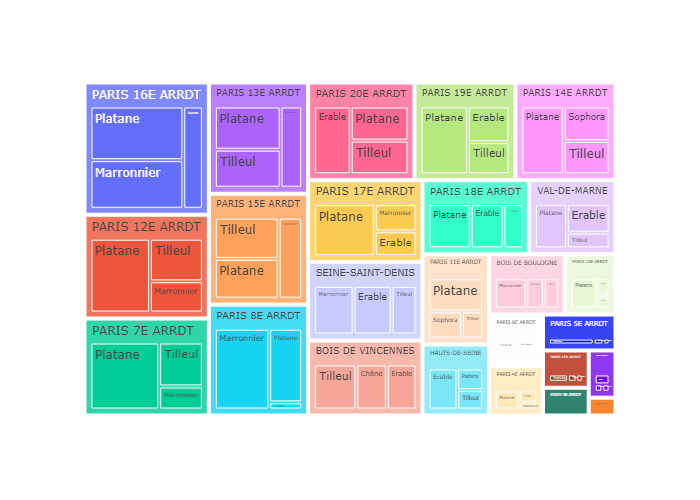

In [30]:
from plotly.express import treemap
state_species = ['ARRONDISSEMENT', 'LIBELLE FRANCAIS']
grouped = df.groupby(['ARRONDISSEMENT', 'LIBELLE FRANCAIS']).size().reset_index(name='count')
top_per_arrondissement = (
    grouped.groupby('ARRONDISSEMENT', group_keys=False)
    .apply(lambda x: x.nlargest(3, 'count'))
)
treemap(data_frame=top_per_arrondissement, path=state_species, values='count').write_image("arbres-all.png")

from IPython.display import Image

# Afficher l'image PNG
Image("arbres-all.png")

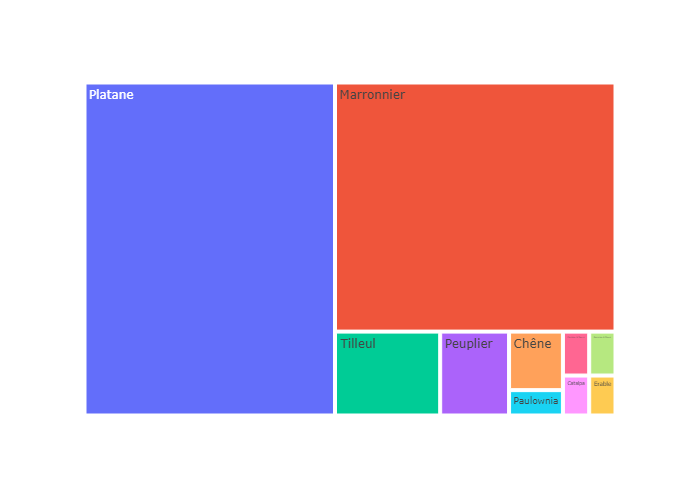

In [64]:
# Étape 1 : Filtrer le DataFrame pour ne garder que les données de "PARIS 16E ARRDT"
paris_16 = df[df['ARRONDISSEMENT'] == "PARIS 6E ARRDT"]

# Étape 2 : Trouver les 10 'LIBELLE FRANCAIS' les plus courants
top_10_species = (
    paris_16['LIBELLE FRANCAIS']
    .value_counts()
    .nlargest(10)
    .reset_index()
)
top_10_species.columns = ['LIBELLE FRANCAIS', 'count']

# Étape 3 : Créer la Treemap avec les données filtrées
fig = treemap(data_frame=top_10_species, path=['LIBELLE FRANCAIS'], values='count')

# Étape 4 : Afficher ou exporter l'image
fig.write_image("paris_6_treemap.png")

from IPython.display import Image

# Afficher l'image PNG
Image("paris_6_treemap.png")

         ARRONDISSEMENT LIBELLE FRANCAIS  count
21     BOIS DE BOULOGNE       Marronnier   1238
31     BOIS DE BOULOGNE          Platane    692
38     BOIS DE BOULOGNE          Tilleul    585
184   BOIS DE VINCENNES          Tilleul   1948
78    BOIS DE VINCENNES            Chêne   1411
...                 ...              ...    ...
2241  SEINE-SAINT-DENIS           Erable   1842
2303  SEINE-SAINT-DENIS          Tilleul   1201
2375       VAL-DE-MARNE          Platane   1520
2340       VAL-DE-MARNE           Erable   1302
2391       VAL-DE-MARNE          Tilleul    713

[75 rows x 3 columns]


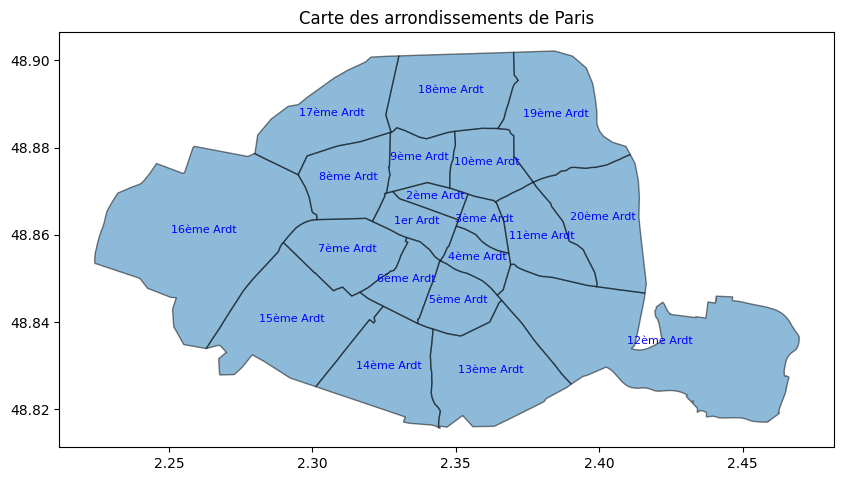

In [38]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données géographiques de Paris (un GeoJSON ou un shapefile)
paris_gdf = gpd.read_file("arrondissements.geojson")

# Tracer la carte
fig, ax = plt.subplots(figsize=(10, 10))
paris_gdf.plot(ax=ax, edgecolor='black', alpha=0.5)

# Ajouter les noms des arrondissements
for idx, row in paris_gdf.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, s=row['l_ar'], 
             horizontalalignment='center', fontsize=8, color='blue')

print(top_per_arrondissement)
plt.title("Carte des arrondissements de Paris")
plt.savefig("paris.png", format="png", dpi=300)
plt.show()

       ARRONDISSEMENT  Shannon Index
0    BOIS DE BOULOGNE       2.124587
1   BOIS DE VINCENNES       3.000042
2      HAUTS-DE-SEINE       2.594820
3     PARIS 10E ARRDT       2.898331
4     PARIS 11E ARRDT       2.841227
5     PARIS 12E ARRDT       2.895884
6     PARIS 13E ARRDT       3.393597
7     PARIS 14E ARRDT       3.038279
8     PARIS 15E ARRDT       3.391834
9     PARIS 16E ARRDT       2.866453
10    PARIS 17E ARRDT       3.151112
11    PARIS 18E ARRDT       3.342620
12    PARIS 19E ARRDT       3.334946
13    PARIS 1ER ARRDT       2.489589
14    PARIS 20E ARRDT       3.415040
15     PARIS 2E ARRDT       2.828582
16     PARIS 3E ARRDT       2.684129
17     PARIS 4E ARRDT       2.787546
18     PARIS 5E ARRDT       2.754298
19     PARIS 6E ARRDT       1.519849
20     PARIS 7E ARRDT       2.038001
21     PARIS 8E ARRDT       1.885711
22     PARIS 9E ARRDT       2.746102
23  SEINE-SAINT-DENIS       3.152970
24       VAL-DE-MARNE       2.959260


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

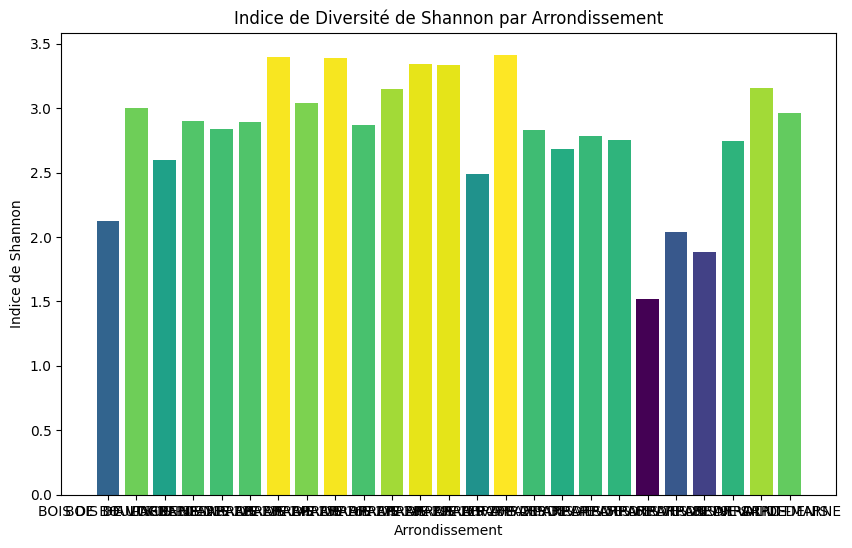

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Calculer les proportions et l'indice de Shannon-Weiner pour chaque arrondissement
results = []

# Grouper par arrondissement
grouped = df.groupby('ARRONDISSEMENT')['LIBELLE FRANCAIS']

for name, group in grouped:
    # Compter les occurrences de chaque espèce
    species_counts = group.value_counts()
    
    # Calculer les proportions
    species_proportions = species_counts / species_counts.sum()
    
    # Calculer l'indice de Shannon-Weiner
    H = -np.sum(species_proportions * np.log(species_proportions))
    
    # Ajouter les résultats
    results.append({
        'ARRONDISSEMENT': name,
        #'Species Counts': species_counts.to_dict(),  # Compte des espèces
        #'Proportions': species_proportions.to_dict(),  # Proportions des espèces
        'Shannon Index': H  # Indice de Shannon-Weiner
    })

# Convertir les résultats en DataFrame
results_df = pd.DataFrame(results)

# Afficher les résultats
print(results_df)


# Normaliser l'indice de Shannon pour le mappage de couleur
norm = plt.Normalize(results_df['Shannon Index'].min(), results_df['Shannon Index'].max())

# Créer un colormap
cmap = cm.viridis  # Vous pouvez choisir d'autres colormaps disponibles

# Créer le graphique
plt.figure(figsize=(10, 6))
bars = plt.bar(results_df['ARRONDISSEMENT'], results_df['Shannon Index'], color=cmap(norm(results_df['Shannon Index'])))

# Ajouter des annotations
plt.title('Indice de Diversité de Shannon par Arrondissement')
plt.xlabel('Arrondissement')
plt.ylabel('Indice de Shannon')

# Ajouter une légende de couleur
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Indice de Shannon', orientation='vertical')

# Afficher le graphique
plt.show()

In [46]:
def transform_arrond(arround):
    arround = arround.replace("PARIS ", "")
    arround = arround.replace("ARRDT", "Ardt")
    arround = arround.replace("1ER", "1er")
    arround = arround.replace("E ", "ème ")
    return arround

In [56]:
shannon_indices = {}
for i in range(25):
    shannon_indices[transform_arrond(results_df["ARRONDISSEMENT"][i])] = results_df["Shannon Index"][i]

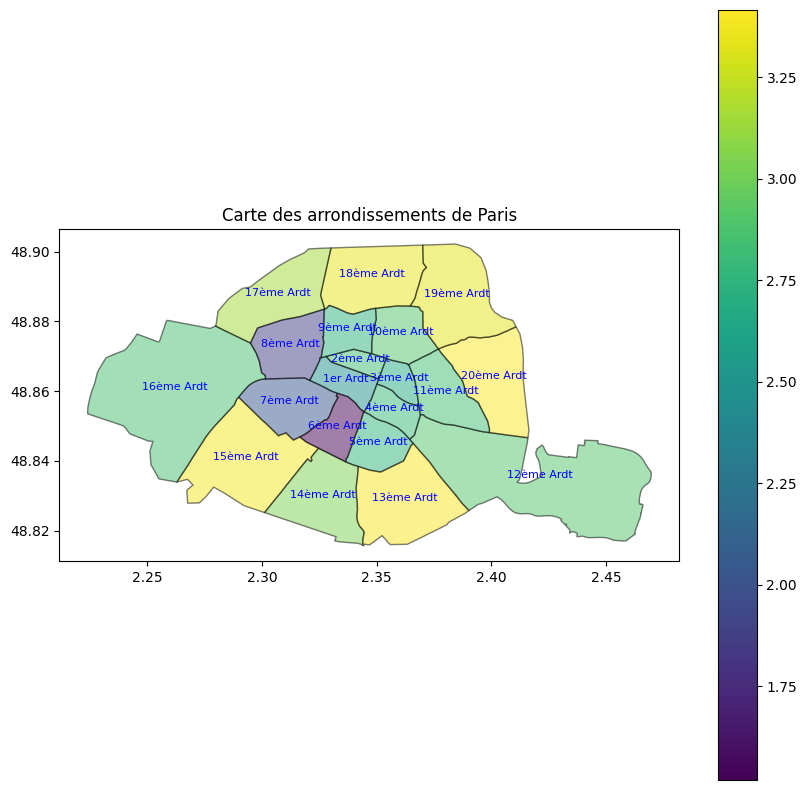

In [61]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données géographiques de Paris (un GeoJSON ou un shapefile)
paris_gdf = gpd.read_file("arrondissements.geojson")

# Convertir le dictionnaire en DataFrame
shannon_df = pd.DataFrame.from_dict(shannon_indices, orient='index', columns=['Shannon Index'])
shannon_df.index.name = 'l_ar'  # Assurez-vous que l'index correspond au nom de l'arrondissement
shannon_df.reset_index(inplace=True)

# Joindre les indices de Shannon au GeoDataFrame
paris_gdf = paris_gdf.merge(shannon_df, on='l_ar')

# Tracer la carte avec les couleurs basées sur l'indice de Shannon
fig, ax = plt.subplots(figsize=(10, 10))
paris_gdf.plot(column='Shannon Index', ax=ax, cmap='viridis', edgecolor='black', alpha=0.5, legend=True)

# Ajouter les noms des arrondissements
for idx, row in paris_gdf.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, s=row['l_ar'], 
             horizontalalignment='center', fontsize=8, color='blue')

plt.title("Carte des arrondissements de Paris")
plt.savefig("paris.png", format="png", dpi=300)
plt.show()

In [65]:
df = read_csv("qualite-de-l-air-exposition-des-parisen-ne-s-au-no2-et-pm2-5.csv",sep=";")
print(df.head())

   Année  Nbre Parisiens soumis à dépassement VR PM2.5  \
0   2015                                           NaN   
1   2021                                           0.0   
2   2016                                           NaN   
3   2020                                           0.0   
4   2022                                           0.0   

   Valeurs réglementaires PM2.5  \
0                            25   
1                            25   
2                            25   
3                            25   
4                            25   

   Nbre Parisiens soumis à dépassement R-OMS PM2.5  Recommandations OMS PM2.5  \
0                                              NaN                         10   
1                                        2200000.0                          5   
2                                              NaN                         10   
3                                        1500000.0                         10   
4                                  

In [79]:
df["NO2_20ardt-expositionVR_parisiens_Airparif "]

0    93000.0
1     4000.0
2    91000.0
3        NaN
4     3000.0
5    47000.0
6    26000.0
7    76000.0
Name: NO2_20ardt-expositionVR_parisiens_Airparif , dtype: float64

In [78]:
df.mean()

Année                                                       2.018500e+03
Nbre Parisiens soumis à dépassement VR PM2.5                0.000000e+00
Valeurs réglementaires PM2.5                                2.500000e+01
Nbre Parisiens soumis à dépassement R-OMS PM2.5             2.083333e+06
Recommandations OMS PM2.5                                   8.750000e+00
Nbre Parisiens soumis à dépassement VR NO2                  6.114286e+05
Valeurs réglementaires NO2                                  4.000000e+01
Evolution % - Nbre parisiens soumis à dépassement VR NO2    4.216667e+01
Nbre Parisiens soumis à dépassement R-OMS NO2               1.235714e+06
Recommandations OMS NO2                                     3.250000e+01
NO2_01ardt-expositionVR_parisiens_Airparif                  1.040000e+04
NO2_02ardt-expositionVR_parisiens_Airparif                  1.000000e+04
NO2_03ardt-expositionVR_parisiens_Airparif                  1.960000e+04
NO2_04ardt-expositionVR_parisiens_Airparif         

In [81]:
df = read_csv("les-arbres.csv",sep=";")

A = 0.5

# Calculer le CO₂ séquestré pour chaque arbre
df['CO2_sequestered'] = A * (df['CIRCONFERENCE (cm)'] ** 2) * df['HAUTEUR (m)']

# Calculer le total de CO₂ séquestré par arrondissement
total_co2_per_arrondissement = df.groupby('ARRONDISSEMENT')['CO2_sequestered'].sum().reset_index()

# Afficher les résultats
print(total_co2_per_arrondissement)

       ARRONDISSEMENT  CO2_sequestered
0    BOIS DE BOULOGNE     5.819414e+08
1   BOIS DE VINCENNES     1.238125e+09
2      HAUTS-DE-SEINE     7.557368e+07
3     PARIS 10E ARRDT     3.777946e+08
4     PARIS 11E ARRDT     4.060921e+08
5     PARIS 12E ARRDT     8.976655e+08
6     PARIS 13E ARRDT     9.669270e+08
7     PARIS 14E ARRDT     1.005795e+09
8     PARIS 15E ARRDT     6.974908e+08
9     PARIS 16E ARRDT     1.836022e+09
10    PARIS 17E ARRDT     8.698966e+08
11    PARIS 18E ARRDT     8.677935e+08
12    PARIS 19E ARRDT     3.998535e+10
13    PARIS 1ER ARRDT     9.845298e+07
14    PARIS 20E ARRDT     1.322820e+09
15     PARIS 2E ARRDT     3.559782e+07
16     PARIS 3E ARRDT     8.659886e+07
17     PARIS 4E ARRDT     2.551789e+08
18     PARIS 5E ARRDT     3.148895e+08
19     PARIS 6E ARRDT     1.547810e+08
20     PARIS 7E ARRDT     9.127819e+08
21     PARIS 8E ARRDT     9.108055e+08
22     PARIS 9E ARRDT     1.053072e+08
23  SEINE-SAINT-DENIS     6.816622e+08
24       VAL-DE-MARNE    

In [92]:
co2_per_arrondissement = {}
for i in range(25):
    co2_per_arrondissement[transform_arrond(total_co2_per_arrondissement["ARRONDISSEMENT"][i])] = total_co2_per_arrondissement["CO2_sequestered"][i]

del co2_per_arrondissement["19ème Ardt"]
co2_per_arrondissement

{'BOIS Dème BOULOGNE': 581941440.0,
 'BOIS Dème VINCENNES': 1238124812.5,
 'HAUTS-DE-SEINE': 75573681.0,
 '10ème Ardt': 377794585.0,
 '11ème Ardt': 406092086.5,
 '12ème Ardt': 897665459.0,
 '13ème Ardt': 966927031.0,
 '14ème Ardt': 1005795355.0,
 '15ème Ardt': 697490844.0,
 '16ème Ardt': 1836021706.0,
 '17ème Ardt': 869896603.5,
 '18ème Ardt': 867793526.5,
 '1er Ardt': 98452979.5,
 '20ème Ardt': 1322819983.0,
 '2ème Ardt': 35597820.5,
 '3ème Ardt': 86598862.5,
 '4ème Ardt': 255178888.5,
 '5ème Ardt': 314889475.0,
 '6ème Ardt': 154780984.5,
 '7ème Ardt': 912781916.5,
 '8ème Ardt': 910805474.0,
 '9ème Ardt': 105307220.5,
 'SEINE-SAINT-DENIS': 681662226.5,
 'VAL-DE-MARNE': 920952844.0}

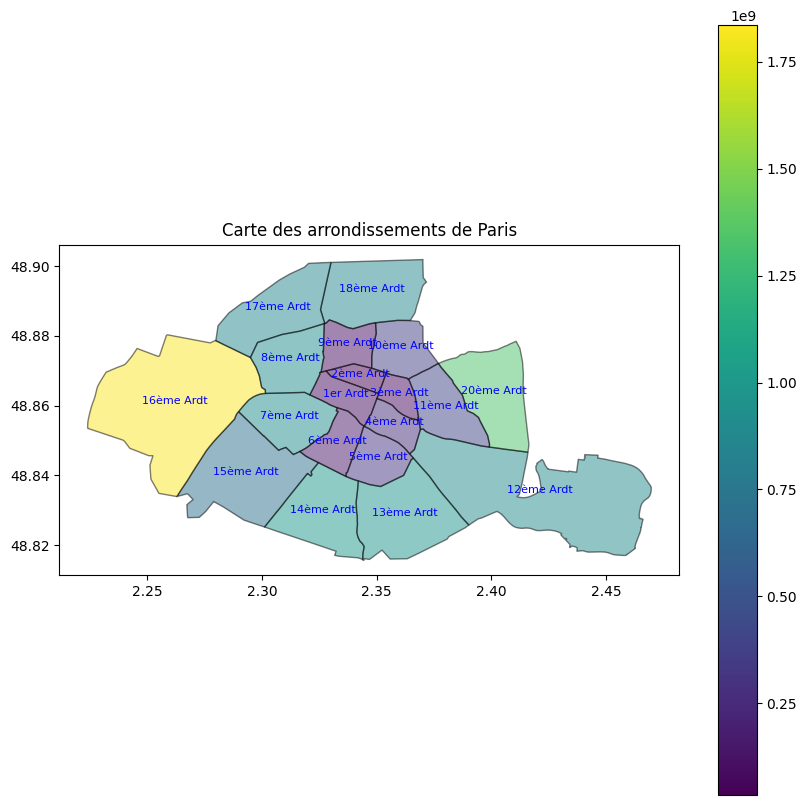

In [93]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Charger les données géographiques de Paris (un GeoJSON ou un shapefile)
paris_gdf = gpd.read_file("arrondissements.geojson")

# Convertir le dictionnaire en DataFrame
co2_df = pd.DataFrame.from_dict(co2_per_arrondissement, orient='index', columns=['CO2 Sequestré'])
co2_df.index.name = 'l_ar'  # Assurez-vous que l'index correspond au nom de l'arrondissement
co2_df.reset_index(inplace=True)

# Joindre les indices de Shannon au GeoDataFrame
paris_gdf = paris_gdf.merge(co2_df, on='l_ar')

# Tracer la carte avec les couleurs basées sur l'indice de Shannon
fig, ax = plt.subplots(figsize=(10, 10))
paris_gdf.plot(column='CO2 Sequestré', ax=ax, cmap='viridis', edgecolor='black', alpha=0.5, legend=True)

# Ajouter les noms des arrondissements
for idx, row in paris_gdf.iterrows():
    plt.text(row.geometry.centroid.x, row.geometry.centroid.y, s=row['l_ar'], 
             horizontalalignment='center', fontsize=8, color='blue')

plt.title("Carte des arrondissements de Paris")
plt.savefig("paris_co2.png", format="png", dpi=300)
plt.show()